In [3]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
random_range = numpy.random

#Assigning values to some parameters
learning_rate = 0.01
step_size = 50
epochs = 1000

#Training Data
#train_X = numpy.asarray([1.2,7.2,1.3,7.9,10.657,12.458,2.365,8.54,9.145,10.187,7.1])
#train_Y = numpy.asarray([2.5,4.7,3.1,4.2,5.10,4.1,7.12,9.14,9.52,10.45,7.65])

#The data for train and test can be done using random function as well
train_X = numpy.asarray(random_range.randn(150))
train_Y = numpy.asarray(random_range.randn(150))

samples = train_X.shape[0]

In [4]:
# Input to the Graph
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Setting the weights for the model
W = tf.Variable(random_range.randn(), name="weight")
b = tf.Variable(random_range.randn(), name="bias")

linear_model = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(linear_model-Y, 2))/(2*samples)

# Gradient descent
gradient_descent_optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0050 cost= 0.985839963 W= 0.0190754 b= 1.02024
Epoch: 0100 cost= 0.650034249 W= 0.00272757 b= 0.615076
Epoch: 0150 cost= 0.526850104 W= 0.00933705 b= 0.369443
Epoch: 0200 cost= 0.480904758 W= 0.0226149 b= 0.219885
Epoch: 0250 cost= 0.463531762 W= 0.0358924 b= 0.128461
Epoch: 0300 cost= 0.456890821 W= 0.0469049 b= 0.0723737
Epoch: 0350 cost= 0.454331398 W= 0.0552697 b= 0.0378531
Epoch: 0400 cost= 0.453339070 W= 0.0613088 b= 0.0165445
Epoch: 0450 cost= 0.452952921 W= 0.065528 b= 0.00335717
Epoch: 0500 cost= 0.452802420 W= 0.0684093 b= -0.00482291
Epoch: 0550 cost= 0.452743828 W= 0.0703451 b= -0.00990734
Epoch: 0600 cost= 0.452721089 W= 0.0716292 b= -0.0130732
Epoch: 0650 cost= 0.452712297 W= 0.0724733 b= -0.0150475
Epoch: 0700 cost= 0.452709049 W= 0.0730237 b= -0.0162805
Epoch: 0750 cost= 0.452707767 W= 0.073381 b= -0.0170514
Epoch: 0800 cost= 0.452707380 W= 0.0736114 b= -0.017534
Epoch: 0850 cost= 0.452707171 W= 0.0737595 b= -0.0178363
Epoch: 0900 cost= 0.452707201 W= 0.0738538 b

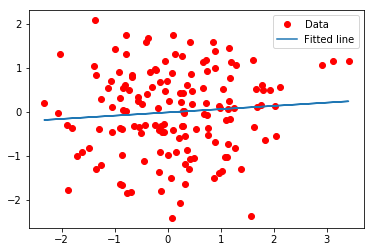

In [8]:
# Initialize the variables to the default values
initialization = tf.global_variables_initializer()

# Start training
with tf.Session() as session:
    session.run(initialization)

    # Fit all training data
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            session.run(gradient_descent_optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % step_size == 0:
            c = session.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:",'%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", session.run(W), "b=", session.run(b))
    print("-------------------------------------------------------")
    print("Optimization Finished!")
    print("-------------------------------------------------------")
    training_cost = session.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", session.run(W), "b=", session.run(b), '\n')

    #PLotting a graphs
    plt.plot(train_X, train_Y, 'ro', label='Data')
    plt.plot(train_X, session.run(W) * train_X + session.run(b), label='Fitted line')
    plt.legend()
    plt.show()